In [1]:
%matplotlib inline
import numpy as np
import openmc

In [2]:
#create materials

#fuel
fuel = openmc.Material(1, "Am242m")
fuel.add_nuclide('Am242_m1',1)
fuel.set_density('g/cm3',13.6)
print(fuel)

#fuel with realistic enrichment
fuel2 = openmc.Material(11, "Am242m less enriched")
fuel2.add_nuclide('Am242_m1', .2)
fuel2.add_nuclide('Am241', .8)
fuel2.set_density('g/cm3', 13.6)
print(fuel2)

#moderator
BeO = openmc.Material(2, "BeO")
BeO.add_nuclide("Be9", .5)
BeO.add_nuclide("O16", .5)
BeO.set_density("g/cm3", 2.86)
print(BeO)

#moderator2
LiD = openmc.Material(3, "LiD")
LiD.add_nuclide("Li7", .5)
LiD.add_nuclide("H2", .49)
LiD.add_nuclide("H1", .01)
LiD.set_density("g/cm3", .9238)
print(LiD)

#graphite
#gra = openmc.Material(4, "C12")
#gra.add_nuclide("c_Graphite", 1.0)
#gra.set_density("g/cm3", 2.266)
#print(gra)

#zirconium deuteride moderator
ZrD2 = openmc.Material(5, "ZrD2")
ZrD2.add_nuclide("Zr91", .33)
ZrD2.add_nuclide("H2", .66)
ZrD2.add_nuclide("H1", .01)
ZrD2.set_density("g/cm3", 5.6)
print(ZrD2)

#titanium deuteride moderator
TiD2 = openmc.Material(6, "TiD2")
TiD2.add_element("Ti", .33)
TiD2.add_nuclide("H2", .66)
TiD2.add_nuclide("H1", .01)
TiD2.set_density('g/cm3', 3.76)
print(TiD2)

#Be moderator
Be = openmc.Material(7, "Be")
Be.add_nuclide("Be9", 1.0)
Be.set_density("g/cm3", 1.85)
print(Be)

#cerium deuteride moderator
CeD3 = openmc.Material(8, "CeD3")
CeD3.add_element("Ce", .25)
CeD3.add_nuclide("H2", .75)
CeD3.set_density("g/cm3", 5.565)

#"vacuum"
vac = openmc.Material(10, "H1")
vac.add_nuclide('H1',1.0)
vac.set_density('g/cm3',0.000001)
print(vac)

#reflector
#may add a reflector in the future. for now just BeO moderator

Material
	ID             =	1
	Name           =	Am242m
	Temperature    =	None
	Density        =	13.6 [g/cm3]
	S(a,b) Tables  
	Nuclides       
	Am242_m1       =	1            [ao]

Material
	ID             =	11
	Name           =	Am242m less enriched
	Temperature    =	None
	Density        =	13.6 [g/cm3]
	S(a,b) Tables  
	Nuclides       
	Am242_m1       =	0.2          [ao]
	Am241          =	0.8          [ao]

Material
	ID             =	2
	Name           =	BeO
	Temperature    =	None
	Density        =	2.86 [g/cm3]
	S(a,b) Tables  
	Nuclides       
	Be9            =	0.5          [ao]
	O16            =	0.5          [ao]

Material
	ID             =	3
	Name           =	LiD
	Temperature    =	None
	Density        =	0.9238 [g/cm3]
	S(a,b) Tables  
	Nuclides       
	Li7            =	0.5          [ao]
	H2             =	0.49         [ao]
	H1             =	0.01         [ao]

Material
	ID             =	5
	Name           =	ZrD2
	Temperature    =	None
	Density        =	5.6 [g/cm3]
	S(a,b) Tables  
	Nuclid

In [13]:
# Outer radius of fuel
fuel_outer = np.sqrt(2) 
fuel_thickness = 1
fuel_inner=fuel_outer-fuel_thickness

# parameters for depth of various things
ref_depth = 10 #depth of top reflecting/moderating layer


In [14]:
#define a cell surface for a single fuel cylinder
f_ps_1 = openmc.Plane(A=1,B=0,C=1/fuel_outer,D=1, boundary_type="vacuum")
f_ps_2 = openmc.Plane(A=-1,B=0,C=1/fuel_outer,D=1, boundary_type="vacuum")
f_ps_3 = openmc.Plane(A=0,B=1,C=1/fuel_outer,D=1, boundary_type="vacuum")
f_ps_4 = openmc.Plane(A=0,B=-1,C=1/fuel_outer,D=1, boundary_type="vacuum")

f_ps_5 = openmc.Plane(A=1,B=0,C=1/fuel_inner,D=1, boundary_type="transmission")
f_ps_6 = openmc.Plane(A=-1,B=0,C=1/fuel_inner,D=1, boundary_type="transmission")
f_ps_7 = openmc.Plane(A=0,B=1,C=1/fuel_inner,D=1, boundary_type="transmission")
f_ps_8 = openmc.Plane(A=0,B=-1,C=1/fuel_inner,D=1, boundary_type="transmission")

f_lower=openmc.ZPlane(z0=0)
m_lower=openmc.ZPlane(z0=-1*ref_depth)
m_1=openmc.XPlane(x0=1,boundary_type="vacuum")
m_2=openmc.XPlane(x0=-1,boundary_type="vacuum")
m_3=openmc.YPlane(y0=1,boundary_type="vacuum")
m_4=openmc.YPlane(y0=-1,boundary_type="vacuum")

#Root Universe
min_x = openmc.XPlane(x0=-35, boundary_type='vacuum')
max_x = openmc.XPlane(x0=+35, boundary_type='vacuum')
min_y = openmc.YPlane(y0=-35, boundary_type='vacuum')
max_y = openmc.YPlane(y0=+35, boundary_type='vacuum')

fuel_region = -f_ps_1 & -f_ps_2 & -f_ps_3 & -f_ps_4 & +f_ps_5 & +f_ps_6 & +f_ps_7 & +f_ps_8
mod_region = +m_lower & +m_2 & -m_1 & +m_4 & -m_3 & -f_ps_5 & -f_ps_6 & -f_ps_7 & -f_ps_8 
#vac_region = ~fuel_region&~mod_region

#fill the fuel region
f=openmc.Cell(1, 'fuel')
f.fill=fuel
f.region=fuel_region

#fill the moderator regions
m = openmc.Cell(2, 'moderator region 1')
m.fill=Be
m.region=mod_region

#v = openmc.Cell(3, 'vacuum')
#v.fill = vac
#v.region = vac_region

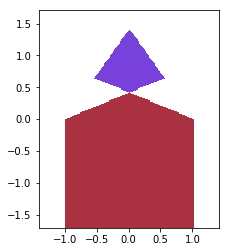

In [15]:
#visualize the fuel geometry
f_univ = openmc.Universe(cells=[f, m])
f_univ.plot(width=(2*fuel_outer, fuel_outer+2), origin = (0,0,0), basis='xz')

In [6]:


# Create fuel assembly Lattice
assembly = openmc.RectLattice(name='lat')
assembly.pitch = (2, 2)
assembly.lower_left = [-2 * 35. / 2.0] * 2
assembly.universes = [[f_univ] * 35] * 35



In [7]:
# Create root Cell
root_cell = openmc.Cell(name='root cell', fill=assembly)

# Add boundary planes
root_cell.region = +min_x & -max_x & +min_y & -max_y & +m_lower & -f_lower

# Create root Universe
root_universe = openmc.Universe(name='root universe')
root_universe.add_cell(root_cell)

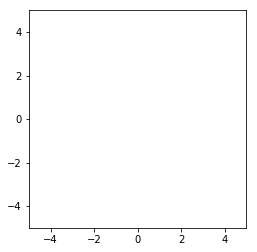

In [18]:

root_universe.plot(width=(10,10), basis='xy')

In [19]:
#create root universe
geom = openmc.Geometry()
geom.root_universe = root_universe

#configure statistics geometry
#source = openmc.stats.Box((-20, -20, 0), (20, 20, fuel_depth))
source = openmc.stats.Point((fuel_outer, 0, 1))
src = openmc.Source(space=source)

#export geometry
geom.export_to_xml()

In [20]:
#create materials & cross sections xmls
mats = openmc.Materials()
mats.cross_sections = '/home/yichengz/nndc_hdf5/cross_sections.xml' #comment this out/replace if you need to
mats.append(fuel)
mats += [fuel2]
mats += [BeO]
mats += [LiD]
#mats += [gra]
mats += [ZrD2]
mats += [TiD2]
mats += [Be]
mats += [CeD3]
mats += [vac]

#export materials
mats.export_to_xml()

In [21]:
settings = openmc.Settings()
settings.particles = 1000
settings.batches = 20
settings.inactive = 10
settings.source = src
settings.export_to_xml()

In [22]:
#configure tallies
cell_filter = openmc.CellFilter(f)
t = openmc.Tally(4)
t.filters = [cell_filter]
t.scores = ['fission']
tallies = openmc.Tallies([t])

#export tallies
tallies.export_to_xml()

In [23]:
openmc.run()

openmc: Relink `/home/yichengz/anaconda3/bin/../lib/./libgfortran.so.4' with `/lib/x86_64-linux-gnu/librt.so.1' for IFUNC symbol `clock_gettime'

                               %%%%%%%%%%%%%%%
                          %%%%%%%%%%%%%%%%%%%%%%%%
                       %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                     %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                  %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                   %%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                ###############      %%%%%%%%%%%%%%%%%%%%%%%%
               ##################     %%%%%%%%%%%%%%%%%%%%%%%
               ###################     %%%%%%%%%%%%%%%%%%%%%%%
               ####################     %%%%%%%%%%%%%%%%%%%%%%
               #####################     %%%%%%%%%%%%%%%%%%%%%
               ######################     %%%%%%%%%%%%%%%%%%%%
               #################

1